In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from markowitz.data import ingest, preprocess
from markowitz.simulate import scenarios, portfolio_return
from markowitz.optimize import perform_opt

### Download the ticker data

In [2]:
exp_ratio = {
    'VBMPX':0.03,
    'VTIFX':0.07,
    'VIIIX':0.02,
    'VSMPX':0.02,
    'VEXRX':0.34,
    'VTPSX':0.07,
    'VGSNX':0.1
}

In [3]:
sd = "2016-01-01"
ed = pd.to_datetime('now').floor('d').strftime('%Y-%m-%d')
tickers = exp_ratio.keys()

data = ingest(tickers, sd, ed)
df = preprocess(data, tickers)

[*********************100%***********************]  7 of 7 completed


In [4]:
print(df.shape)
display(df.head(3))

(1330, 15)


,Date,VBMPX,VTIFX,VIIIX,VSMPX,VEXRX,VTPSX,VGSNX,VBMPX-ret,VTIFX-ret,VIIIX-ret,VSMPX-ret,VEXRX-ret,VTPSX-ret,VGSNX-ret
0,2016-01-04,10.66,31.740000,183.820007,93.790001,73.209999,95.040001,17.260000,0.999062,1.001260,1.002013,1.001813,1.000000,0.998632,1.020278
1,2016-01-05,10.65,31.780001,184.190002,93.959999,73.209999,94.910004,17.610001,1.003756,1.001888,0.987241,0.986696,0.984565,0.985038,0.996593
2,2016-01-06,10.69,31.840000,181.839996,92.709999,72.080002,93.489998,17.549999,1.000935,0.999058,0.976298,0.975731,0.973085,0.980426,0.980627


In [5]:
for c in df.columns:
    if df[c].isnull().sum() == 0:
        print(c, 'all_good')
    else:
        print(c, 'missing_data. deleting the column')
        df = df.drop(columns=c)

Date all_good
VBMPX all_good
VTIFX all_good
VIIIX all_good
VSMPX all_good
VEXRX all_good
VTPSX all_good
VGSNX all_good
VBMPX-ret all_good
VTIFX-ret all_good
VIIIX-ret all_good
VSMPX-ret all_good
VEXRX-ret all_good
VTPSX-ret all_good
VGSNX-ret all_good


### Simulate and visualize

In [6]:
# 1-year returns for each vehicle across multiple scenarios
# each row is a scenario
rdf = scenarios(df, tickers, ndays=180, nscenarios=600)
print(rdf.shape)
rdf.head()

(600, 7)


,VBMPX,VTIFX,VIIIX,VSMPX,VEXRX,VTPSX,VGSNX
0,0.000067,-4.599140e-06,0.001026,0.001395,0.001760,0.001639,0.002185
1,-0.000133,8.234145e-05,0.000224,0.000286,-0.000075,0.000151,-0.000491
2,-0.000124,5.610321e-07,0.001986,0.001936,0.001148,0.001105,-0.000157
3,0.000015,-1.165413e-04,-0.000755,-0.000728,-0.000591,-0.000643,-0.001435
4,0.000050,1.564273e-04,0.001241,0.001390,0.000835,0.000277,-0.000176


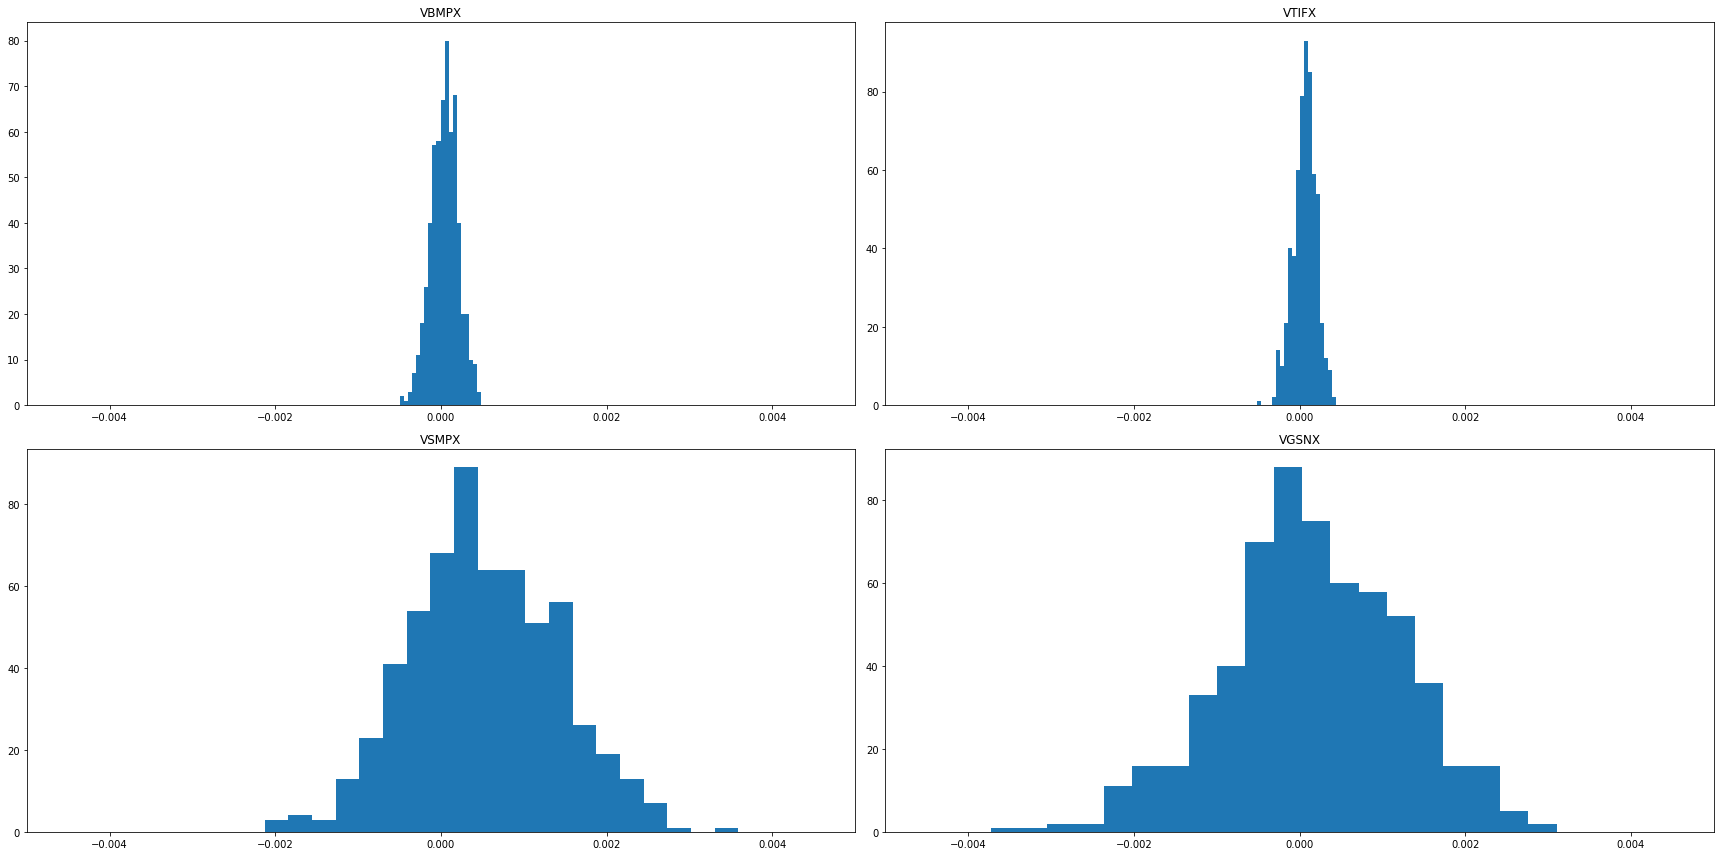

In [7]:
assets = ["VBMPX","VTIFX","VSMPX","VGSNX"]

fig = plt.figure(figsize=(24, 12))
ctr = 0
for i in range(len(assets)):
    plt.subplot(2,2,i+1)
    plt.hist(rdf[assets[i]], bins=20)
    plt.xlim([-0.005,0.005])
    plt.title(assets[i])

plt.tight_layout()
plt.show()

### Optimize

In [8]:
for ndays in [15,30,60,90,180,270,360]:
    rdf = scenarios(df, tickers, ndays, nscenarios=600)
    resdf = perform_opt(rdf, exp_ratio)
    print('\n'+str(ndays))
    display(resdf)

/Users/anshulagarwal/opt/anaconda3/envs/aag/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")



15


,VTIFX,VSMPX,return,risk
0,0.610968,0.389032,0.022756,0.000364
1,0.665408,0.334592,0.020257,0.000315
2,0.724836,0.275164,0.017530,0.000265
3,0.791193,0.208807,0.014484,0.000214
4,0.877192,0.122808,0.010537,0.000162


/Users/anshulagarwal/opt/anaconda3/envs/aag/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")



30


,VBMPX,VTIFX,VSMPX,return,risk
0,0.372097,0.000000,0.627903,0.032413,0.000364
1,0.450015,0.000000,0.549985,0.028775,0.000315
2,0.000000,0.558661,0.441339,0.025049,0.000265
3,0.000000,0.649448,0.350552,0.021029,0.000214
4,0.000000,0.749547,0.250453,0.016597,0.000162
5,0.000000,0.882133,0.117867,0.010725,0.000109


/Users/anshulagarwal/opt/anaconda3/envs/aag/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")



60


,VBMPX,VTIFX,VSMPX,return,risk
0,0.068920,0.000000,0.931080,0.047363,0.000364
1,0.181234,0.000000,0.818766,0.042177,0.000315
2,0.296609,0.000000,0.703391,0.036851,0.000265
3,0.416410,0.000000,0.583590,0.031320,0.000214
4,0.000000,0.572318,0.427682,0.025052,0.000162
5,0.000000,0.717563,0.282437,0.018583,0.000109
6,0.317773,0.581627,0.100600,0.009967,0.000055


/Users/anshulagarwal/opt/anaconda3/envs/aag/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")



90


,VBMPX,VTIFX,VSMPX,return,risk
0,0.000000,0.000000,1.000000,0.050141,0.000302
1,0.000000,0.000000,1.000000,0.050141,0.000302
2,0.110221,0.000000,0.889779,0.045024,0.000265
3,0.261403,0.000000,0.738597,0.038005,0.000214
4,0.417568,0.000000,0.582432,0.030755,0.000162
5,0.000000,0.610623,0.389377,0.022871,0.000109
6,0.000000,0.822774,0.177226,0.013396,0.000055


/Users/anshulagarwal/opt/anaconda3/envs/aag/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")



180


,VTIFX,VSMPX,return,risk
0,0.000000,1.000000,0.051924,0.000146
1,0.000000,1.000000,0.051924,0.000146
2,0.000000,1.000000,0.051924,0.000146
3,0.000000,1.000000,0.051924,0.000146
4,0.000000,1.000000,0.051924,0.000146
5,0.227742,0.772258,0.041539,0.000109
6,0.571340,0.428660,0.025870,0.000055


/Users/anshulagarwal/opt/anaconda3/envs/aag/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")



270


,VBMPX,VSMPX,return,risk
0,0.000000,1.000000,0.050248,0.000103
1,0.000000,1.000000,0.050248,0.000103
2,0.000000,1.000000,0.050248,0.000103
3,0.000000,1.000000,0.050248,0.000103
4,0.000000,1.000000,0.050248,0.000103
5,0.000000,1.000000,0.050248,0.000103
6,0.397136,0.602864,0.032302,0.000055


/Users/anshulagarwal/opt/anaconda3/envs/aag/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")



360


,VTIFX,VSMPX,return,risk
0,0.000000,1.000000,0.054608,0.000061
1,0.000000,1.000000,0.054608,0.000061
2,0.000000,1.000000,0.054608,0.000061
3,0.000000,1.000000,0.054608,0.000061
4,0.000000,1.000000,0.054608,0.000061
5,0.000000,1.000000,0.054608,0.000061
6,0.081924,0.918076,0.050660,0.000055


In [9]:
w = {
    'VBMPX':0.15,
    'VTIFX':0.25,
    'VIIIX':0.0,
    'VSMPX':0.6,
    'VEXRX':0.0,
    'VTPSX':0.0,
    'VGSNX':0.0
}

for ndays in [15,30,60,90,180,270,360]:
    rdf = scenarios(df, tickers, ndays, nscenarios=600)
    pdf, perc_neg_scenarios, avg_neg_return, avg_return = portfolio_return(rdf, w)
    print(ndays, perc_neg_scenarios, avg_neg_return, avg_return)

15 0.3983333333333333 -0.0005581169318722337 0.00031882016462153514
30 0.38666666666666666 -0.0003536700128258965 0.00031713155948344916
60 0.345 -0.00022558868935466464 0.0003248377172552778
90 0.3333333333333333 -0.00017132204958739808 0.0003201206382307022
180 0.2633333333333333 -8.055108772465731e-05 0.0003339869112412384
270 0.22333333333333333 -5.630183804983682e-05 0.00032519977981395676
360 0.15666666666666668 -3.210455654787104e-05 0.00035047666101086254
